<a href="https://colab.research.google.com/github/felladib/H_SentimentAnalysis_REC/blob/main/(Amazon)hybfiltrgae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import metrics
from keras.layers import Embedding, Multiply, Dense, Dot, Conv2D, Input, Flatten , BatchNormalization , Dropout
from keras.layers import concatenate
from keras.models import Model

## **filtring model_data**

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Our_Datasets/Yelp/yelp_normalized_dataset(55738).csv') #open dataset
#dataset['updated_rating'] = dataset['rating']

FileNotFoundError: ignored

In [ ]:
dataset.shape

(55738, 121)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
dataset.head(1)

,user_id,item_id,rating,text,fans,average_stars,friends,vote_funny,useful,vote_cool,hot,more,profile,cute,list,note,plain,cool,funny,writer,photos,Shopping,Fashion,Food,Local Services,Home Services,Grocery,Drugstores,Department Stores,Flowers & Gifts,Beauty & Spas,Home Decor,Health & Medical,Furniture Stores,Electronics,Sporting Goods,Cosmetics & Beauty Supply,Arts & Crafts,Accessories,Jewelry,Arts & Entertainment,Event Planning & Services,Nurseries & Gardening,Appliances,Shoe Stores,Discount Store,Active Life,Music & Video,Mags,Books,Hardware Stores,Eyewear & Opticians,Florists,Specialty Food,Restaurants,Mobile PhonesConvenience Stores,Optometrists,Used,Vintage & Consignment,Gift Shops,IT Services & Computer Repair,Art Galleries,Building Supplies,Thrift Stores,Automotive,Mattresses,Wine & Spirits,Beer,Hair Salons,Professional Services,Kitchen & Bath,Bridal,Sports Wear,Tobacco Shops,Antiques,Pharmacy,Toy Stores,Bookstores,Hobby Shops,Bikes,Nightlife,Shopping Centers,Education,Appliances & Repair,Local Flavor,Photography Stores & Services,Skin Care,Bakeries,Doctors,Mobile Phone Repair,Outdoor Gear,Wholesale Stores,Computers,Art Supplies,Bars,Coffee & Tea,Watches,Jewelry Repair,Mobile Phone Accessories,Electronics Repair,Fruits & Veggies,Office Equipment,Venues & Event Spaces,Contractors,Wedding Planning,Bike Repair/Maintenance,Ophthalmologists,Music & DVDs,Bike Rentals,Formal Wear,Interior Design,Baby Gear & Furniture,Landscaping,Guns & Ammo,Telecommunications,Printing Services,Hair Removal,Vape Shops,Watch Repair,Party & Event Planning,Specialty Schools
0,0,575,3,We don't actually dress like this but if you l...,0.008016,0.805851,0.012982,0.001776,0.002434,0.001527,0.002501,0.003279,0.000721,0.004902,0.001717,0.002926,0.001181,0.002126,0.002126,0.001721,0.00087,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# def ponderation(datset , alpha):
#     for index, row in dataset.iterrows():
#       row['rating'] = row['rating']/5
#       row['rating'] = (alpha * row['rating']) + (1-alpha)*(row['valuer_conf']*row['sentiment'])
#       row['rating'] = row['rating']*5
def ponderation(dataset, alpha):
    dataset['updated_rating'] = dataset['rating'] / 5
    dataset['updated_rating'] = (alpha * dataset['updated_rating']) + (1 - alpha) * (dataset['valuer_conf'] * dataset['sentiment'])
    dataset['updated_rating'] = dataset['updated_rating'] * 5

In [ ]:
ponderation(dataset , 0.7)

In [ ]:
dataset.head(0)

,user_id,item_id,text,rating,verified,"Arts, Crafts & Sewing",Sewing,Crafting,Scrapbooking & Stamping,Beading & Jewelry Making,"Painting, Drawing & Art Supplies",Painting,Sewing Notions & Supplies,Die-Cutting & Embossing,Paper & Paper Crafts,Knitting & Crochet,Die-Cuts,Beads & Bead Assortments,Craft Supplies,Drawing


In [ ]:
def dataset_split(dataset): #normal testset
    # Spliting into X and y
    X = dataset[['user_id','item_id', 'text',	'Arts, Crafts & Sewing','Sewing','Crafting',
                 'Scrapbooking & Stamping',	'Beading & Jewelry Making','Painting, Drawing & Art Supplies',
                 'Painting',	'Sewing Notions & Supplies','Die-Cutting & Embossing','Paper & Paper Crafts',
                 'Knitting & Crochet','Die-Cuts','Beads & Bead Assortments',	'Craft Supplies',	'Drawing']]
    y = dataset['rating']
    X_train , y_train , X_test , y_test = train_test_split(X , y , test_size=0.2 , random_state=0)
    return X_train , y_train , X_test , y_test


In [ ]:
X_train, X_test, y_train, y_test = dataset_split(dataset)

In [ ]:
train_userDATA = X_train[[]] #17

train_itemDATA = X_train[['Arts, Crafts & Sewing','Sewing','Crafting',
                 'Scrapbooking & Stamping',	'Beading & Jewelry Making','Painting, Drawing & Art Supplies',
                 'Painting',	'Sewing Notions & Supplies','Die-Cutting & Embossing','Paper & Paper Crafts',
                 'Knitting & Crochet','Die-Cuts','Beads & Bead Assortments',	'Craft Supplies',	'Drawing']]

In [ ]:
train_userID = X_train['user_id']
train_itemID = X_train['item_id']

In [ ]:
train_itemDATA.shape

(143263, 15)

In [ ]:
# y_train.astype('float64')# train_userID, train_itemID, train_userDATA, train_itemDATA

In [ ]:
def getnum_user_item(X_train):
    num_users = int(max(X_train.user_id.max()+1,X_test.user_id.max()+1))
    num_items = int(max(X_train.item_id.max()+1,X_test.item_id.max()+1))
    return num_users , num_items

num_users , num_items = getnum_user_item(X_train)

In [ ]:
print(num_users , num_items )

18458 7594


In [ ]:
 from tensorflow.keras.utils import to_categorical
 y = to_categorical(y_train)
 y.shape

(143263, 6)

In [ ]:
y_train = tf.constant(y, shape=[y_train.shape[0], 6])

In [ ]:
y_train

# **module de filtrage**

**GMF part**

In [ ]:
# class GMF(tf.keras.Model):
#     def __init__(self, emb_size_gmf, num_users, num_items):
#         super(GMF, self).__init__()
#         self.user_emb_GMF = tf.keras.layers.Embedding(num_users, emb_size_gmf, name='user_emb_GMF')
#         self.item_emb_GMF = tf.keras.layers.Embedding(num_items, emb_size_gmf, name='item_emb_GMF')
#         self.flat_u_GMF   = tf.keras.layers.Flatten()
#         self.flat_i_GMF   = tf.keras.layers.Flatten()
#         self.mul_layer    = tf.keras.layers.Multiply()

#     def call(self, input_userID , input_itemID , input_userDATA ,input_itemDATA):
#         u = self.user_emb_GMF(input_userID)
#         i = self.item_emb_GMF(input_itemID)
#         u = self.flat_u_GMF(u)
#         i = self.flat_i_GMF(i)
#         return self.mul_layer([i, u])


 **MLP part**

In [ ]:
# class MLP(tf.keras.Model):
#     def __init__(self, num_users, num_items, emb_size_mlp, predictive_factors,num_layers ):
#         super(MLP, self).__init__()
#         self.user_emb_MLP = tf.keras.layers.Embedding(num_users, emb_size_mlp, name='user_emb_MLP')
#         self.item_emb_MLP = tf.keras.layers.Embedding(num_items, emb_size_mlp, name='item_emb_MLP')
#         self.flat_u_MLP   = tf.keras.layers.Flatten()
#         self.flat_i_MLP   = tf.keras.layers.Flatten()
#         self.concat_layer = tf.keras.layers.Concatenate()
#         self.layer_list   = []
#         for l in range(num_layers,0,-1):
#             layer = tf.keras.layers.Dense(predictive_factors*(2**(l-1)), activation='relu', name= 'layer%d' %(num_layers-l+1))
#             self.layer_list.append(layer)

#     def call(self, input_userID , input_itemID , input_userDATA ,input_itemDATA):
#         u = self.user_emb_MLP(input_userID)
#         i = self.item_emb_MLP(input_itemID)
#         u = self.flat_u_MLP(u)
#         i = self.flat_i_MLP(i)
#         c = self.concat_layer([i, u, input_userDATA, input_itemDATA])
#         for layer in self.layer_list:
#             c = layer(c)
#         return c


**NHF model**

In [ ]:
# class NHF(tf.keras.Model):
#     def __init__(self, emb_size_gmf, num_users, num_items, emb_size_mlp, predictive_factors, l):
#         super(NHF, self).__init__()
#         self.gmf = GMF(emb_size_gmf, num_users, num_items)
#         self.mlp = MLP(num_users, num_items, emb_size_mlp, predictive_factors, l)
#         self.concat_layer = tf.keras.layers.Concatenate()
#         self.dense = tf.keras.layers.Dense(1, activation='linear') # amazon dataset

#     def call(self, input_userID,input_itemID, input_userDATA,input_itemDATA):
#         gmf_output = self.gmf(input_userID,input_itemID, input_userDATA , input_itemDATA)
#         mlp_output = self.mlp(input_userID,input_itemID, input_userDATA , input_itemDATA)
#         concatenated_output = self.concat_layer([gmf_output, mlp_output])
#         return self.dense(concatenated_output)


**entrainement de NHF model**

In [ ]:
#  cree le model NHF
def build_NHF_model(emb_size_hmlp, emb_size_gmf, predictive_factors, num_layers):

    # emb_size_hmlp : size of embedding layer for mlp  model
    # emb_size_gmf    : size of embedding layer for GMF  model
    # predictive_factors : pour le nombre d'unite des couche dense dnas la partie mlp
    # num_layers : numero de layer de mlp


    # définition des input pour les deux model gmf et mlp
    input_userID = Input(shape = [1], name = 'user_ID')
    input_itemID = Input(shape = [1], name = 'item_ID')

    input_userDATA = Input(shape = [0], name = 'user_data')
    input_itemDATA = Input(shape = [15], name = 'item_data')#avant shape=[49]

    #GMF part
    user_latent_factors_GMF = emb_size_gmf
    item_latent_factors_GMF = emb_size_gmf

    user_emb_GMF = Embedding(num_users, user_latent_factors_GMF, name = 'user_emb_GMF')(input_userID)
    item_emb_GMF = Embedding(num_items, item_latent_factors_GMF, name = 'item_emb_GMF')(input_itemID)

    flat_u_GMF = Flatten()(user_emb_GMF)
    flat_i_GMF = Flatten()(item_emb_GMF)

    mul_layer = Multiply()([flat_u_GMF, flat_i_GMF]) # user embedding and item embedding

    #HybMLP part
    user_latent_factors_hMLP = emb_size_hmlp
    item_latent_factors_hMLP = emb_size_hmlp

    user_emb_hMLP = Embedding(num_users, user_latent_factors_hMLP, name= 'user_emb_hMLP')(input_userID)
    item_emb_hMLP = Embedding(num_items, item_latent_factors_hMLP, name= 'item_emb_hMLP')(input_itemID)

    flat_u_hMLP = Flatten()(user_emb_hMLP)
    flat_i_hMLP = Flatten()(item_emb_hMLP)

    concat_hMLP = concatenate([flat_u_hMLP, flat_i_hMLP, input_userDATA, input_itemDATA])
    layer = concat_hMLP
    for l in range(num_layers,0,-1):
        layer = Dense(predictive_factors*(2**(l-1)), activation='relu',
                      #kernel_regularizer=tf.keras.regularizers.L1(0.01) ,
                      name= 'layer%d' %(num_layers-l+1))(layer)

        # kernel_regularizer=tf.keras.regularizers.L1(0.00001)
        #kernel_regularizer = tf.keras.regularizers.L1L2(l1=1e-3, l2=1e-3)
        #layer = BatchNormalization(name=f'batch_norm_{l}')(layer)
        #layer = Dropout(rate=0.7, name=f'dropout_{l}')(layer)


    #NeuHybMF part :  concatener le model gmf et mlp
    concat_NeuhMF = concatenate([mul_layer,layer])
    out = Dense(5, activation='softmax', name='output')(concat_NeuhMF)

    NHF_model = Model([input_userID,input_userDATA, input_itemID ,input_itemDATA], out)

    return NHF_model


In [ ]:
emb_size_gmf = 64
num_users , num_items = getnum_user_item(X_train)
emb_size_mlp = 64
predictive_factors = 16
l = 5

In [ ]:

# NHF_model = NHF(emb_size_gmf, num_users, num_items, emb_size_mlp, predictive_factors, l)

In [ ]:
NHF = build_NHF_model(emb_size_mlp, emb_size_gmf, predictive_factors, l)

In [ ]:

# dans le cas d'utilisation de amazon dataset
NHF.compile(optimizer='adam', loss='categorical_crossentropy',sample_weight_mode='temporal' ,metrics=['mae' , tf.keras.metrics.RootMeanSquaredError(),tf.keras.metrics.Precision()])

In [ ]:
history = NHF.fit([train_userID,train_userDATA, train_itemID ,train_itemDATA] , y_train , batch_size=32, epochs=15,validation_split=0.2)


Epoch 1/15
3582/3582 [==============================] - 61s 14ms/step - loss: 0.8611 - mae: 0.1374 - root_mean_squared_error: 0.2598 - precision: 0.7822 - val_loss: 0.7124 - val_mae: 0.1202 - val_root_mean_squared_error: 0.2385 - val_precision: 0.7949
Epoch 2/15
3582/3582 [==============================] - 46s 13ms/step - loss: 0.5001 - mae: 0.0889 - root_mean_squared_error: 0.1966 - precision: 0.8681 - val_loss: 0.6498 - val_mae: 0.1059 - val_root_mean_squared_error: 0.2272 - val_precision: 0.8350
Epoch 3/15
3582/3582 [==============================] - 46s 13ms/step - loss: 0.1973 - mae: 0.0395 - root_mean_squared_error: 0.1224 - precision: 0.9855 - val_loss: 0.7295 - val_mae: 0.1076 - val_root_mean_squared_error: 0.2379 - val_precision: 0.8322
Epoch 4/15
3582/3582 [==============================] - 42s 12ms/step - loss: 0.0808 - mae: 0.0177 - root_mean_squared_error: 0.0775 - precision: 0.9927 - val_loss: 0.8238 - val_mae: 0.1014 - val_root_mean_squared_error: 0.2432 - val_precision:

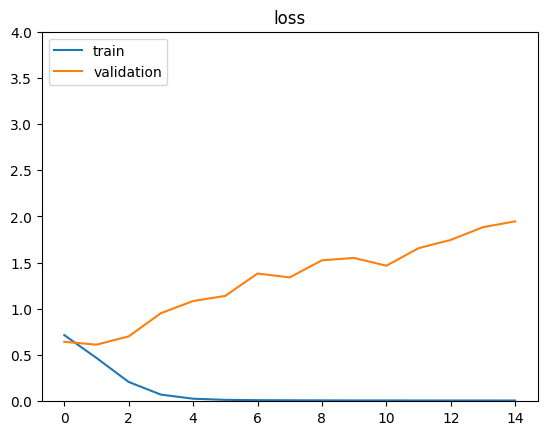

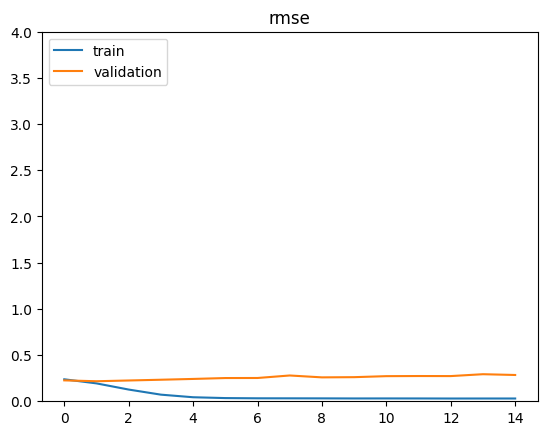

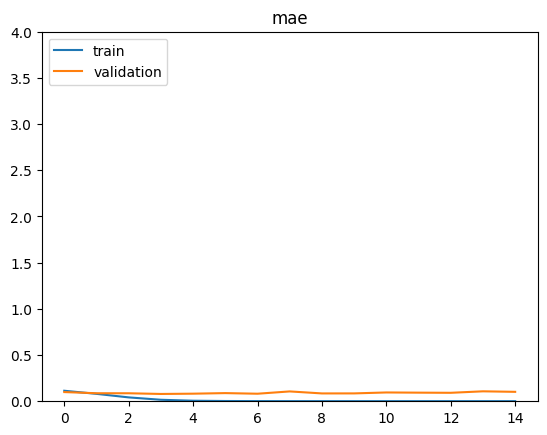

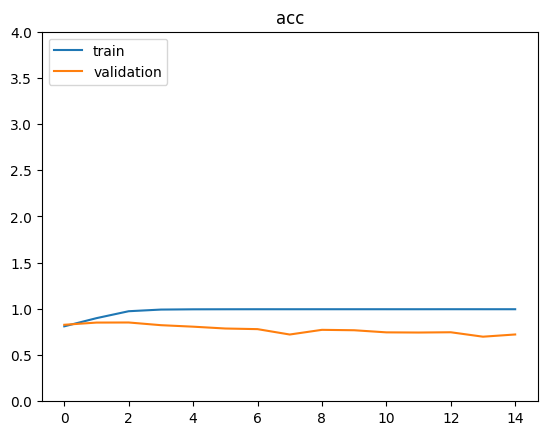

In [ ]:
import matplotlib.pyplot as plt
loss_curve= history.history["loss"]
acc_curve = history.history["precision"]
rmse_curve= history.history["root_mean_squared_error"]
mae_curve = history.history["mae"]

loss_val = history.history["val_loss"]
acc_val  = history.history["val_precision"]
rmse_val = history.history["val_root_mean_squared_error"]
mae_val  = history.history["val_mae"]

# ploter loss function
def ploter(title , curve , valid):
  plt.plot(curve , label = "train")
  plt.plot(valid , label = "validation")
  plt.legend(loc='upper left')
  plt.ylim(0,4)
  plt.title(title)
  plt.show()

ploter('loss' , loss_curve , loss_val)
ploter('rmse' , rmse_curve , rmse_val)
ploter('mae' , mae_curve , mae_val)
ploter('acc' , acc_curve , acc_val)

In [ ]:
test_userDATA = X_test[[]]

test_itemDATA = X_test[['Arts, Crafts & Sewing','Sewing','Crafting',
                 'Scrapbooking & Stamping',	'Beading & Jewelry Making','Painting, Drawing & Art Supplies',
                 'Painting',	'Sewing Notions & Supplies','Die-Cutting & Embossing','Paper & Paper Crafts',
                 'Knitting & Crochet','Die-Cuts','Beads & Bead Assortments',	'Craft Supplies',	'Drawing']]

In [ ]:
test_userID = X_test['user_id']
test_itemID = X_test['item_id']

In [ ]:
 from tensorflow.keras.utils import to_categorical
 y = to_categorical(y_test)
 y.shape

(35816, 6)

In [ ]:
y[0:5]

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
y_test = tf.constant(y, shape=[y_test.shape[0], 6])

In [ ]:
y_test

<tf.Tensor: shape=(35816, 6), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)>

In [ ]:
NHF.evaluate([test_userID,test_userDATA,test_itemID,test_itemDATA],y_test)

1120/1120 [==============================] - 4s 3ms/step - loss: 1.8906 - mae: 0.1013 - root_mean_squared_error: 0.2827 - precision: 0.7275


[1.890588402748108,
 0.10131844133138657,
 0.2826771140098572,
 0.7275431752204895]

In [ ]:
NHF.save('TEST', save_format='tf')

In [ ]:
loaded_model_SA = tf.keras.models.load_model('TEST')

In [ ]:

sentiment = loaded_model_SA.predict([test_userID,test_userDATA,test_itemID,test_itemDATA])


250/250 [==============================] - 1s 3ms/step


In [ ]:
sentiment

array([[4.23629332e-04, 2.28115963e-03, 5.52160665e-02, 8.33073020e-01,
        1.09006055e-01],
       [1.00846046e-04, 9.82405618e-03, 9.56954062e-02, 4.65850294e-01,
        4.28529412e-01],
       [3.70968628e-05, 3.18556093e-03, 9.88853276e-02, 7.81864941e-01,
        1.16027057e-01],
       ...,
       [1.44032744e-10, 6.31279349e-08, 1.04489331e-07, 1.52885586e-05,
        9.99984503e-01],
       [2.07987875e-02, 1.10777274e-01, 2.56548464e-01, 1.42173976e-01,
        4.69701529e-01],
       [8.10321071e-04, 1.31733844e-03, 1.56305373e-01, 1.56194074e-02,
        8.25947583e-01]], dtype=float32)